https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/variational-principles/the-principle-of-virtual-work/illustrative-examples-for-the-principle-of-virtual-work/

10.1.3.1

In [1]:
import sympy as sp
from sympy import Matrix, diff, integrate, simplify
x1,x2,x3 = sp.symbols("x_1 x_2 x_3")
s = Matrix([[x1*x2,5,0],[5,x1,0],[0,0,0]])
x = Matrix([[x1,x2,x3]])
pb1,pb2,pb3 =[-sum([diff(s[i,j],x[i]) for i in range(3)]) for j in range(3)]
display("\u03C1b_1 =",pb1)
display("\u03C1b_2 =",pb2)
display("\u03C1b_3 =",pb3)
a,b,t = sp.symbols("a b t")
ustar = Matrix([a*x1 + b*x2, 0])
display("u* =",ustar)
gradustar = Matrix([[diff(i,j) for j in x[:2]]for i in ustar])
display("\u2207u* =",gradustar)
ustara = ustar.subs({x1:2})
ustarb = ustar.subs({x2:1})
ustarc = ustar.subs({x1:0})
ustard = ustar.subs({x2:0})
s = Matrix([[x1*x2,5],[5,x1]])
na = Matrix([1,0])
nb = Matrix([0,1])
nc = Matrix([-1,0])
nd = Matrix([0,-1])
ta = (s*na).subs({x1:2})
tb = (s*nb).subs({x2:1})
tc = (s*nc).subs({x1:0})
td = (s*nd).subs({x2:0})
display("t_A =",ta,"t_B =",tb,"t_C =",tc,"t_D =",td)
estar = sp.Rational("1/2")*(gradustar+gradustar.T)
display("\u03B5* =",estar)
ststrain = sum([s[i]*estar[i] for i in range(4)])
display("ststrain =",ststrain)
IVW = integrate(ststrain,(x1,0,2),(x2,0,1),(x3,0,t))
display("Internal Virtual Work =",IVW)
EVWBodyForces = integrate(pb1*ustar[0],(x1,0,2),(x2,0,1),(x3,0,t))
display("External Virtual Work|_{Body Forces} =",EVWBodyForces)
EVWa = integrate((ta.dot(ustara)).subs({x1:2}),(x2,0,1),(x3,0,t))
display("External Virtual Work|_A =",EVWa)
EVWb = integrate((tb.dot(ustarb)).subs({x2:1}),(x1,0,2),(x3,0,t))
display("External Virtual Work|_B =",EVWb)
EVWc = integrate((tc.dot(ustarc)).subs({x1:0}),(x2,0,1),(x3,0,t))
display("External Virtual Work|_C =",EVWc)
EVWd = integrate((td.dot(ustard)).subs({x2:0}),(x1,0,2),(x3,0,t))
display("External Virtual Work|_D =",EVWd)
EVW = simplify(EVWBodyForces+EVWa+EVWb+EVWc+EVWd)
display("External Virtual Work = Internal Virtual Work =",EVW)

'ρb_1 ='

-x_2

'ρb_2 ='

0

'ρb_3 ='

0

'u* ='

Matrix([
[a*x_1 + b*x_2],
[            0]])

'∇u* ='

Matrix([
[a, b],
[0, 0]])

't_A ='

Matrix([
[2*x_2],
[    5]])

't_B ='

Matrix([
[  5],
[x_1]])

't_C ='

Matrix([
[ 0],
[-5]])

't_D ='

Matrix([
[  -5],
[-x_1]])

'ε* ='

Matrix([
[  a, b/2],
[b/2,   0]])

'ststrain ='

a*x_1*x_2 + 5*b

'Internal Virtual Work ='

t*(a + 10*b)

'External Virtual Work|_{Body Forces} ='

t*(-a - 2*b/3)

'External Virtual Work|_A ='

t*(2*a + 2*b/3)

'External Virtual Work|_B ='

t*(10*a + 10*b)

'External Virtual Work|_C ='

0

'External Virtual Work|_D ='

-10*a*t

'External Virtual Work = Internal Virtual Work ='

t*(a + 10*b)

10.1.3.2

In [2]:
import sympy as sp
from sympy import Function,dsolve,diff,simplify,integrate
x,EI,L = sp.symbols("x EI L")
y = Function("y")
a = sp.symbols("a")
y1 = y(x).subs(x,0)
y2 = y(x).subs(x,L)
yp1 = y(x).diff(x).subs(x,0)
yp2 = y(x).diff(x).subs(x,L)
q = -5*x
s = dsolve(EI*y(x).diff(x,4)-q,y(x),ics={y1:0,y2:0,yp1:0,yp2:0})
y = s.rhs
display("y(x) =",y)
th = simplify(diff(y,x))
M = simplify(EI*diff(y,x,x))
V = simplify(EI*diff(y,x,x,x))
display("th =",th,"M =",M,"V =",V)
M1 = M.subs({x:0})
M2 = M.subs({x:L})
V1 = V.subs({x:0})
V2 = V.subs({x:L})
display("M@x=0",M1,"M@x=L",M2,"V@x=0",V1,"V@x=L",V2)
ystar = a*x**2
thstar = diff(ystar,x)
ystar1 = ystar.subs({x:0})
ystar2 = ystar.subs({x:L})
thstar1 = thstar.subs({x:0})
thstar2 = thstar.subs({x:L})
display("y*@x=0",ystar1,"y*@x=L",ystar2,"\u03B8*@x=0",thstar1,"\u03B8*@x=L",thstar2)
IVW = integrate(M*diff(ystar,x,x),(x,0,L))
display("Internal Virtual Work =",IVW)
EVWq = integrate(q*ystar,(x,0,L))
display("EVWq =",EVWq)
EVW1 = V1*ystar1-M1*thstar1
EVW2 = M2*thstar2-V2*ystar2
display("EVW1 =",EVW1,"EVW2 =",EVW2)
EVW = EVWq+EVW1+EVW2
display("External Virtual Work = Internal Virtual Work =",EVW)

'y(x) ='

x**2*(-2*L**3 + 3*L**2*x - x**3)/(24*EI)

'th ='

-x*(4*L**3 - 9*L**2*x + 5*x**3)/(24*EI)

'M ='

-L**3/6 + 3*L**2*x/4 - 5*x**3/6

'V ='

3*L**2/4 - 5*x**2/2

'M@x=0'

-L**3/6

'M@x=L'

-L**3/4

'V@x=0'

3*L**2/4

'V@x=L'

-7*L**2/4

'y*@x=0'

0

'y*@x=L'

L**2*a

'θ*@x=0'

0

'θ*@x=L'

2*L*a

'Internal Virtual Work ='

0

'EVWq ='

-5*L**4*a/4

'EVW1 ='

0

'EVW2 ='

5*L**4*a/4

'External Virtual Work = Internal Virtual Work ='

0

10.1.3.6

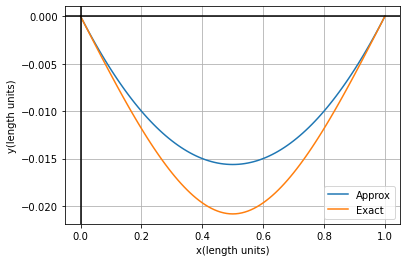

In [3]:
from sympy import Function,dsolve,diff,integrate,Poly,solve,simplify
import numpy as np
import matplotlib.pyplot as plt
y = Function("y")
x,EI,L,P = sp.symbols("x EI L P")
a2,a3,a2s,a3s = sp.symbols("a_2 a_3 a_2s a_3s")
y1 = y(x).subs({x:0})
th2 = y(x).diff(x).subs(x,L/2)
M1 = y(x).diff(x,2).subs(x,0)
V2 = y(x).diff(x,3).subs(x,L/2)
s = dsolve(y(x).diff(x,4),y(x),ics={y1:0,th2:0,M1:0,V2:P/2/EI})
y1 = s.rhs
y2 = simplify(y1.subs({x:L-x}))
yapprox = a2*x*(x-L)+a3*x*(x**2-L**2)
ystar = yapprox.subs({a2:a2s,a3:a3s})
EVW = (-P*ystar).subs({x:L/2}).expand()
IVW = integrate(EI*diff(yapprox,x,x)*diff(ystar,x,x),(x,0,L)).expand()
Eq1 = IVW.coeff(a2s)-EVW.coeff(a2s)
Eq2 = IVW.coeff(a3s)-EVW.coeff(a3s)
s = solve({Eq1,Eq2},{a2,a3})
yapprox = yapprox.subs({a2:s[a2],a3:s[a3]})
y1exactp = y1.subs({L:1,EI:1,P:1})
y2exactp = y2.subs({L:1,EI:1,P:1})
yp = yapprox.subs({L:1,EI:1,P:1})
xL = xrange = np.arange(0,1.01,0.01)
Y1 = []
Y2 = []
for i in range(len(xL)):
    Y1.append(yp.subs({x:xL[i]}))
    #piecewise for exact : y1 when 0<=x<L/2, y2 when L/2=<x<L
    if i<(len(xL)/2):
        Y2.append(y1exactp.subs({x:xL[i]}))
    else:
        Y2.append(y2exactp.subs({x:xL[i]}))
fig, ax = plt.subplots()
plt.xlabel("x(length units)")
plt.ylabel("y(length units)")
ax.plot(xL, Y1, label="Approx")
ax.plot(xL, Y2, label="Exact")
ax.legend()
ax.grid(True, which='both')
ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

10.2.3
https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/variational-principles/the-principle-of-minimum-potential-energy-for-conservative-systems-in-equilibrium/#example7

In [4]:
import sympy as sp
from sympy import cos,sin,solve,diff
th = sp.symbols("theta")
Equil = -140-900*cos(th)+750*4*cos(th)*sin(th)
s = solve(Equil,th)
s=[(i.expand(complex=True)).evalf() for i in s]
degs = [(i/sp.pi*180).evalf() for i in s]
display("Equilibrium =",Equil)
display("there are 4 real roots of  the above expression")
display(s)
display("\u03B8_1 =",degs[1])
display("\u03B8_2 =",degs[2])
display("\u03B8_3 =",degs[3])
display("\u03B8_4 =",degs[0]+360)
PE = 750/2*(2*sin(th))**2-140*th-900*sin(th)
DPE = diff(PE,th)
D2PE = diff(DPE,th)
display("Potential Energy =",PE)
display("Derivative of PE",DPE,"Second Derivative of Pe",D2PE)
display("D2PE@\u03B8=\u03B8_1 =",D2PE.subs({th:s[1]}))
display("D2PE@\u03B8=\u03B8_2 =",D2PE.subs({th:s[2]}))
display("D2PE@\u03B8=\u03B8_3 =",D2PE.subs({th:s[3]}))
display("D2PE@\u03B8=\u03B8_4 =",D2PE.subs({th:s[0]+2*sp.pi}))

'Equilibrium ='

3000*sin(theta)*cos(theta) - 900*cos(theta) - 140

'there are 4 real roots of  the above expression'

[-1.60671931233911, 0.357372501315347, 1.50386577625812, 2.88707368835543]

'θ_1 ='

20.4759360394028

'θ_2 ='

86.1651619337559

'θ_3 ='

165.417137486034

'θ_4 ='

267.941764540807

'Potential Energy ='

-140*theta + 1500.0*sin(theta)**2 - 900*sin(theta)

'Derivative of PE'

3000.0*sin(theta)*cos(theta) - 900*cos(theta) - 140

'Second Derivative of Pe'

-3000.0*sin(theta)**2 + 900*sin(theta) + 3000.0*cos(theta)**2

'D2PE@θ=θ_1 ='

2580.61374931343

'D2PE@θ=θ_2 ='

-2075.17703180460

'D2PE@θ=θ_3 ='

2846.24320219929

'D2PE@θ=θ_4 ='

-3891.67991970813